See https://github.com/ed1d1a8d/inverse-scaling-eval-pipeline/blob/public-colab/notebooks/inverse_scaling.ipynb for source-controlled version of this notebook.

# Set up
Run the cell below to install all of the necessary packages (should take ~45 seconds).

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title Set up script { display-mode: "form" }
#@markdown Run this cell to install the necessary packages.
%%shell
rm -rf /content/inverse-scaling-eval-pipeline
cd /content
pip uninstall -y eval-pipeline
git clone -b public-colab --single-branch https://github.com/ed1d1a8d/inverse-scaling-eval-pipeline.git &> /dev/null
pip install git+https://github.com/ed1d1a8d/inverse-scaling-eval-pipeline.git@public-colab &> /dev/null

# somehow these commands fix matplotlib to draw in the notebook
# https://stackoverflow.com/questions/64862818/cannot-import-name-png-from-matplotlib
%matplotlib inline
python -m pip uninstall matplotlib -y
pip install matplotlib==3.1.3 &> /dev/null


/bin/bash: line 8: fg: no job control
Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Successfully uninstalled matplotlib-3.5.3


# Set OpenAI key (optional)

If you will be evaluating on OpenAI GPT models, change the key below to you actual key and (re-)run the cell. (Don't use quotes!)

In [1]:
# The following loads Tony's API key.
# You are free to use it if you don't have your own key.
# I've put a 75$ limit on the account.
!cp /content/drive/Shareddrives/Inverse-Scaling-Prize-2022-submission/dev/tony-openai-key.env /content/.env
from dotenv import load_dotenv
load_dotenv()

# Uncomment to load your own key
# %env OPENAI_API_KEY=sk-XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

True

# Run scaling experiments

1. Choose from the evaluation metrics `classification`, `sequence_prob`, `logodds`, and `absolute_logodds`.
   
   Descriptions of the evaluation metrics can be found in [this section of the README](https://github.com/inverse-scaling/prize).

2. Upload a file to the colab and set `file_name` to the file you just uploaded.

3. Select models on which you want to evaluate scaling (you can mix OPT and GPT models if you want!)

  - OPT models: `["opt-125m", "opt-350m", "opt-1.3b", "opt-2.7b", "opt-6.7b", "opt-13b"]`
  - GPT models: `["ada", "babbage", "curie", "davinci"]`
  - Instruct GPT models (w/ RLHF): `["text-ada-001", "text-babbage-001", "text-curie-001", "text-davinci-001"]`
  - [Complete list available models and their corresponding sizes](https://github.com/ed1d1a8d/inverse-scaling-eval-pipeline/blob/d7b0de68258525fddb2fb1f05091755ebaa24775/eval_pipeline/plot_loss.py#L19).

In [2]:
#@title Run models { display-mode: "form" }
#@markdown Specify the fields below and run this cell. The evaluation results will be in the /content/results folder.
evaluation_metric = "classification" #@param ["classification", "sequence_prob", "logodds", "absolute_logodds", "classification_acc"]
file_name = "levenson_selfreport_psychopathy.csv" #@param {"type": "string"}
model_names = ["opt-125m", "ada", "babbage", "curie", "davinci"] #@param {"type": "raw"}
model_names_string = ' '.join(model_names)

%run /content/inverse-scaling-eval-pipeline/eval_pipeline/main.py \
--dataset-path "/content/$file_name" \
--exp-dir /content/results \
--models $model_names_string \
--task-type $evaluation_metric \
--batch-size 100 \
--use-gpu

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

# Plot results

{0: ({'ada': 3.110871320031952e-05,
      'babbage': 3.3370605030574775e-05,
      'curie': 3.345320327802534e-05,
      'davinci': 8.583313666232518e-05,
      'opt-125m': 3.8664313807647156e-35},
     26)}


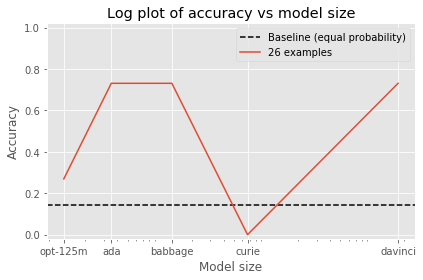

In [3]:
### Plot accuracy
%run /content/inverse-scaling-eval-pipeline/eval_pipeline/plot_loss.py \
  /content/results \
  --task-type classification_acc

{0: ({'ada': 3.110871320031952e-05,
      'babbage': 3.3370605030574775e-05,
      'curie': 3.345320327802534e-05,
      'davinci': 8.583313666232518e-05,
      'opt-125m': 3.8664313807647156e-35},
     26)}


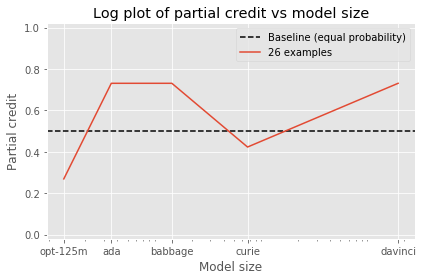

In [4]:
### Plot accuracy w/ partial credit
%run /content/inverse-scaling-eval-pipeline/eval_pipeline/plot_loss.py \
  /content/results \
  --task-type classification_partial

(125000000, 350000000, 1300000000, 6700000000, 175000000000) (2.02855686041025, 1.149477018759801, 0.8575171151986489, 2.1694185733795166, 1.2401881034557636) (0.09775440629684203, 0.2212814338267539, 0.16041778181125987, 0.16956377781453252, 0.09498808026490614)
{0: ({'ada': 3.110871320031952e-05,
      'babbage': 3.3370605030574775e-05,
      'curie': 3.345320327802534e-05,
      'davinci': 8.583313666232518e-05,
      'opt-125m': 3.8664313807647156e-35},
     26)}


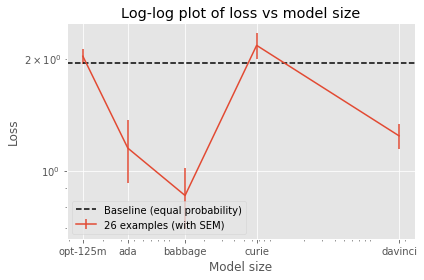

In [5]:
### Plot loss
%run /content/inverse-scaling-eval-pipeline/eval_pipeline/plot_loss.py \
  /content/results \
  --task-type classification_loss

### Move results to google drive
You may need to clean out the `/content/results` folder if you do multiple runs with this notebook.

In [6]:
# Move results
dataset_name = file_name.strip(".csv")
!mkdir -p /content/drive/Shareddrives/Inverse-Scaling-Prize-2022-submission/results/$dataset_name/$evaluation_metric
!cp /content/results/* /content/drive/Shareddrives/Inverse-Scaling-Prize-2022-submission/results/$dataset_name/$evaluation_metric